In [1]:
import pandas as pd
from pmdarima import auto_arima
import tool
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
train, test = tool.make_monthly_data('IndexPrices__US734.xlsx')

In [3]:
# Prophet using all available data
US734_train, US734_test = tool.data_process("IndexPrices__US734.xlsx")
US734_train.iloc[197,0]
US734_train = US734_train[198:].reset_index(drop=True)
US734_model_obj = Prophet()
US734_forecast = tool.make_forecast(US734_model_obj, US734_train)
tool.timeseries_evaluation_metrics_func(US734_train.y,US734_forecast[:len(US734_train)].yhat)


09:59:09 - cmdstanpy - INFO - Chain [1] start processing
09:59:10 - cmdstanpy - INFO - Chain [1] done processing


Evaluation metric results:-
MSE is : 0.009029220116136334
MAE is : 0.06992325131325952
RMSE is : 0.09502220854166848
MAPE is : 0.07422269779450832
R2 is : 0.7087156147087748


In [4]:
tool.timeseries_evaluation_metrics_func(US734_test.y,US734_forecast[len(US734_train):].yhat)

Evaluation metric results:-
MSE is : 0.29918931558790457
MAE is : 0.4936107720245349
RMSE is : 0.546982006639985
MAPE is : 0.37535832331996727
R2 is : -0.717382942061995
Your model is not good enough. Please adjust it.


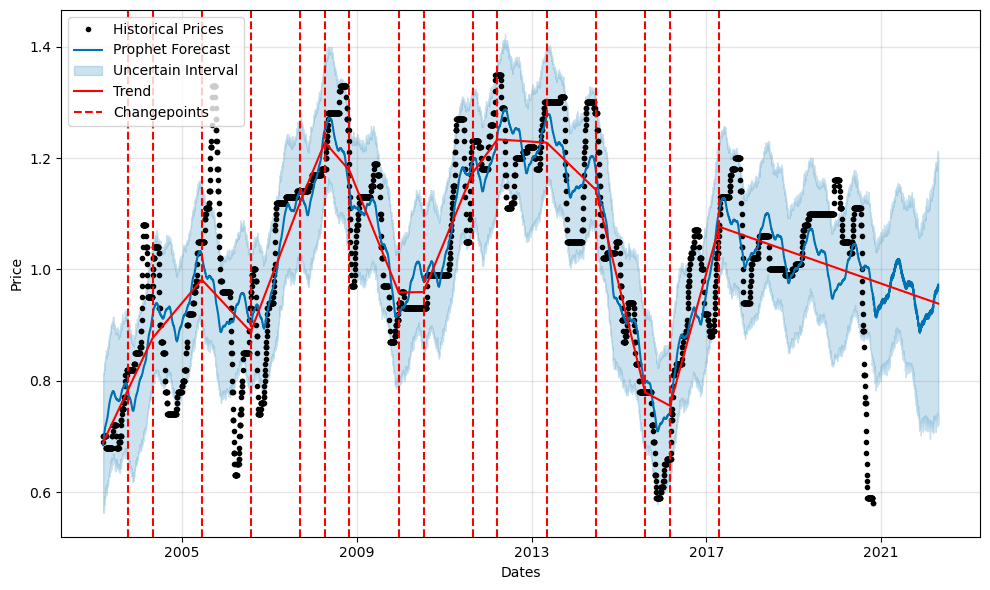

In [5]:
fig = US734_model_obj.plot(US734_forecast)
a = add_changepoints_to_plot(fig.gca(), US734_model_obj, US734_forecast)
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend(["Historical Prices", "Prophet Forecast", "Uncertain Interval", "Trend", "Changepoints"],loc='upper left')